## NBA Position Predictoy Project 
## DS 3000 Final Project

### Group 10: Brandon Onyejekwe, Christina Long, Joshua Liu, Michelle Meredith
### 16 November 2021

## Initial Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
link = 'https://www.nbastuffer.com/2021-2022-nba-player-stats/'  # data source
df = pd.read_html(link)[0]
stats_df = df

In [3]:
# clean up the verbose column names 
stats_df = stats_df.rename(columns={
    "FULL NAME":"NAME",
    "MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor": "MIN%", 
    "USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor": "USG%",
    "TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions":"TO%",
    "eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA":"eFG%",
    "TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.":"TS%",
    "PPGPointsPoints per game.":"PPG",
    "RPGReboundsRebounds per game.":"RPG",
    "TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.":"TRB%",
    "APGAssistsAssists per game.":"APG",
    "AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court":"AST%",
    "SPGStealsSteals per game.":"SPG",
    "BPGBlocksBlocks per game.":"BPG",
    "TOPGTurnoversTurnovers per game.":"TOPG",
    "VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10":"VI",
    "ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.":"ORTG",
    "DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.":"DRTG"                  
    })

In [4]:
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
0,NaN,Precious Achiuwa,Tor,F,22.24,21,26.5,55.2,17.2,10.3,...,8.2,16.7,1.6,8.4,0.52,0.57,1.10,7.1,96.4,101.4
1,NaN,Steven Adams,Mem,C,28.41,28,24.8,51.6,13.4,21.8,...,8.6,18.6,2.6,14.0,0.82,0.64,1.71,8.7,117.7,106.1
2,NaN,Bam Adebayo,Mia,C-F,24.41,18,32.9,68.5,25.9,15.3,...,10.2,17.4,3.2,16.0,1.11,0.33,2.94,10.3,111.1,96.7
3,NaN,Santi Aldama,Mem,F-C,20.93,16,9.7,20.3,20.6,6.6,...,2.6,14.5,0.8,10.8,0.13,0.19,0.31,8.1,98.3,103.4
4,NaN,LaMarcus Aldridge,Bro,C-F,36.41,25,23.6,49.2,22.2,6.3,...,5.7,12.8,0.9,6.6,0.40,1.16,0.76,7.0,121.4,102.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,NaN,Trae Young,Atl,G,23.24,27,34.3,71.5,34.6,15.4,...,4.1,6.4,9.4,46.9,0.96,0.11,4.19,11.8,116.2,111.5
477,NaN,Omer Yurtseven,Mia,C,23.49,19,6.9,14.4,20.0,11.9,...,2.0,16.3,0.3,7.1,0.05,0.47,0.37,7.1,108.8,97.9
478,NaN,Cody Zeller,Por,F-C,29.19,24,13.3,27.7,15.4,14.2,...,4.5,18.5,0.8,9.1,0.29,0.25,0.67,7.9,130.2,97.9
479,NaN,Ivica Zubac,Lac,C,24.75,28,25.0,52.1,14.5,15.9,...,8.0,16.7,1.1,6.6,0.57,1.14,1.32,7.1,134.0,96.9


In [5]:
stats_df.shape

(481, 29)

In [6]:
stats_df.describe()

,RANK,AGE,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
count,0.0,481.000000,481.000000,481.000000,481.000000,481.000000,472.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,438.000000,439.000000
mean,NaN,26.166611,18.690229,19.196050,39.991060,18.095218,12.609958,34.991684,0.677372,91.047817,...,3.569231,10.047401,1.818503,13.133888,0.614033,0.396881,1.050312,6.480042,108.635616,103.488610
std,NaN,4.363428,8.177821,10.381177,21.630601,6.171466,8.083910,39.370038,0.265339,88.508497,...,2.576531,5.583681,1.828550,11.961788,0.455694,0.421683,0.901668,3.109350,13.535934,5.884036
min,NaN,18.980000,1.000000,0.900000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.300000,78.700000
25%,NaN,22.690000,13.000000,10.700000,22.300000,14.200000,8.900000,7.000000,0.611000,20.000000,...,1.700000,6.400000,0.600000,6.500000,0.270000,0.110000,0.430000,5.300000,101.600000,100.600000
50%,NaN,25.290000,21.000000,18.700000,39.000000,17.700000,11.650000,21.000000,0.750000,68.000000,...,3.100000,8.900000,1.200000,10.400000,0.550000,0.290000,0.820000,6.600000,109.050000,104.000000
75%,NaN,29.090000,26.000000,28.600000,59.500000,21.400000,14.925000,49.000000,0.841000,135.000000,...,4.800000,12.900000,2.400000,17.600000,0.910000,0.550000,1.380000,7.900000,116.600000,107.200000
max,NaN,41.520000,29.000000,38.000000,79.300000,37.700000,100.000000,263.000000,1.000000,405.000000,...,14.600000,58.600000,10.300000,165.000000,2.170000,3.000000,5.000000,35.300000,165.400000,121.500000


In [7]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    0 non-null      float64
 1   NAME    481 non-null    object 
 2   TEAM    481 non-null    object 
 3   POS     481 non-null    object 
 4   AGE     481 non-null    float64
 5   GP      481 non-null    int64  
 6   MPG     481 non-null    float64
 7   MIN%    481 non-null    float64
 8   USG%    481 non-null    float64
 9   TO%     472 non-null    float64
 10  FTA     481 non-null    int64  
 11  FT%     481 non-null    float64
 12  2PA     481 non-null    int64  
 13  2P%     481 non-null    float64
 14  3PA     481 non-null    int64  
 15  3P%     481 non-null    float64
 16  eFG%    470 non-null    float64
 17  TS%     471 non-null    float64
 18  PPG     481 non-null    float64
 19  RPG     481 non-null    float64
 20  TRB%    481 non-null    float64
 21  APG     481 non-null    float64
 22  AS

In [8]:
print(stats_df.isnull().sum(), '\n')
print(stats_df.isnull().sum(axis=1).sort_values(ascending=False))

RANK    481
NAME      0
TEAM      0
POS       0
AGE       0
GP        0
MPG       0
MIN%      0
USG%      0
TO%       9
FTA       0
FT%       0
2PA       0
2P%       0
3PA       0
3P%       0
eFG%     11
TS%      10
PPG       0
RPG       0
TRB%      0
APG       0
AST%      0
SPG       0
BPG       0
TOPG      0
VI        0
ORTG     43
DRTG     42
dtype: int64 

252    6
222    6
412    6
397    6
90     6
      ..
161    1
160    1
159    1
158    1
240    1
Length: 481, dtype: int64


In [9]:
stats2_df = stats_df[stats_df.isnull().sum(axis=1) < 2] # get rid of rows w/o sufficient data
stats2_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
0,NaN,Precious Achiuwa,Tor,F,22.24,21,26.5,55.2,17.2,10.3,...,8.2,16.7,1.6,8.4,0.52,0.57,1.10,7.1,96.4,101.4
1,NaN,Steven Adams,Mem,C,28.41,28,24.8,51.6,13.4,21.8,...,8.6,18.6,2.6,14.0,0.82,0.64,1.71,8.7,117.7,106.1
2,NaN,Bam Adebayo,Mia,C-F,24.41,18,32.9,68.5,25.9,15.3,...,10.2,17.4,3.2,16.0,1.11,0.33,2.94,10.3,111.1,96.7
3,NaN,Santi Aldama,Mem,F-C,20.93,16,9.7,20.3,20.6,6.6,...,2.6,14.5,0.8,10.8,0.13,0.19,0.31,8.1,98.3,103.4
4,NaN,LaMarcus Aldridge,Bro,C-F,36.41,25,23.6,49.2,22.2,6.3,...,5.7,12.8,0.9,6.6,0.40,1.16,0.76,7.0,121.4,102.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,NaN,Thaddeus Young,San,F,33.48,21,14.6,30.5,19.7,15.5,...,3.5,12.7,2.6,25.6,0.95,0.29,1.05,10.6,114.5,100.7
476,NaN,Trae Young,Atl,G,23.24,27,34.3,71.5,34.6,15.4,...,4.1,6.4,9.4,46.9,0.96,0.11,4.19,11.8,116.2,111.5
477,NaN,Omer Yurtseven,Mia,C,23.49,19,6.9,14.4,20.0,11.9,...,2.0,16.3,0.3,7.1,0.05,0.47,0.37,7.1,108.8,97.9
478,NaN,Cody Zeller,Por,F-C,29.19,24,13.3,27.7,15.4,14.2,...,4.5,18.5,0.8,9.1,0.29,0.25,0.67,7.9,130.2,97.9


In [10]:
# Simplifying position names to a player's primary position to address combination positions
stats2_df['POS'] = [pos[0] for pos in stats2_df['POS']]
print(stats2_df['POS'])

0      F
1      C
2      C
3      F
4      C
      ..
475    F
476    G
477    C
478    F
479    C
Name: POS, Length: 438, dtype: object


<ipython-input-10-ca6e206421d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats2_df['POS'] = [pos[0] for pos in stats2_df['POS']]


In [11]:
stats2_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
0,NaN,Precious Achiuwa,Tor,F,22.24,21,26.5,55.2,17.2,10.3,...,8.2,16.7,1.6,8.4,0.52,0.57,1.10,7.1,96.4,101.4
1,NaN,Steven Adams,Mem,C,28.41,28,24.8,51.6,13.4,21.8,...,8.6,18.6,2.6,14.0,0.82,0.64,1.71,8.7,117.7,106.1
2,NaN,Bam Adebayo,Mia,C,24.41,18,32.9,68.5,25.9,15.3,...,10.2,17.4,3.2,16.0,1.11,0.33,2.94,10.3,111.1,96.7
3,NaN,Santi Aldama,Mem,F,20.93,16,9.7,20.3,20.6,6.6,...,2.6,14.5,0.8,10.8,0.13,0.19,0.31,8.1,98.3,103.4
4,NaN,LaMarcus Aldridge,Bro,C,36.41,25,23.6,49.2,22.2,6.3,...,5.7,12.8,0.9,6.6,0.40,1.16,0.76,7.0,121.4,102.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,NaN,Thaddeus Young,San,F,33.48,21,14.6,30.5,19.7,15.5,...,3.5,12.7,2.6,25.6,0.95,0.29,1.05,10.6,114.5,100.7
476,NaN,Trae Young,Atl,G,23.24,27,34.3,71.5,34.6,15.4,...,4.1,6.4,9.4,46.9,0.96,0.11,4.19,11.8,116.2,111.5
477,NaN,Omer Yurtseven,Mia,C,23.49,19,6.9,14.4,20.0,11.9,...,2.0,16.3,0.3,7.1,0.05,0.47,0.37,7.1,108.8,97.9
478,NaN,Cody Zeller,Por,F,29.19,24,13.3,27.7,15.4,14.2,...,4.5,18.5,0.8,9.1,0.29,0.25,0.67,7.9,130.2,97.9


In [12]:
# stats2_df is main dataframe


#divide the data into the input 'X' and the labels 'y'
X        = stats2_df[[
 'MIN%',
 'USG%',
 'TO%',
 'FTA',
 'FT%',
 '2PA',
 '2P%',
 '3PA',
 '3P%',
 'eFG%',
 'TS%',
 'PPG',
 'RPG',
 'TRB%',
 'APG',
 'AST%',
 'SPG',
 'BPG',
 'TOPG',
 'VI',
 'ORTG',
 'DRTG']] #the observations
y        = stats2_df['POS'] #the label


In [13]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6, stratify = y 
                                        #TODO: enter the appropriate values to partition the data, 
                                        #and ensure your results are reproducible
                                        #and obtain stratified samples
                                        ) 

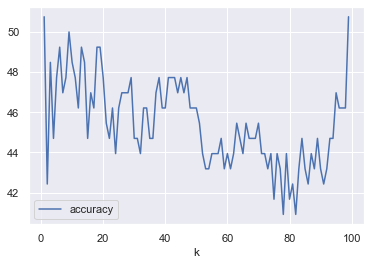

In [14]:
k = []
accuracy = []
#build the k-nn model, experiment with different values of k and plot the results
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    k.append(i)
    accuracy.append(knn.score(X_test, y_test)*100)
    #print(knn.predict(X_test))
    #print('The accuracy of the model is {}'.format(knn.score(X_test, y_test)))
    
    
acc = pd.DataFrame({'k': k, 'accuracy': accuracy})
lines = acc.plot.line(x = 'k')
    

In [15]:
knn = KNeighborsClassifier(n_neighbors=8) 
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.33      0.29      0.31        17
           F       0.39      0.46      0.42        52
           G       0.62      0.54      0.58        63

    accuracy                           0.48       132
   macro avg       0.45      0.43      0.44       132
weighted avg       0.49      0.48      0.48       132

